<div style="text-align: left;">
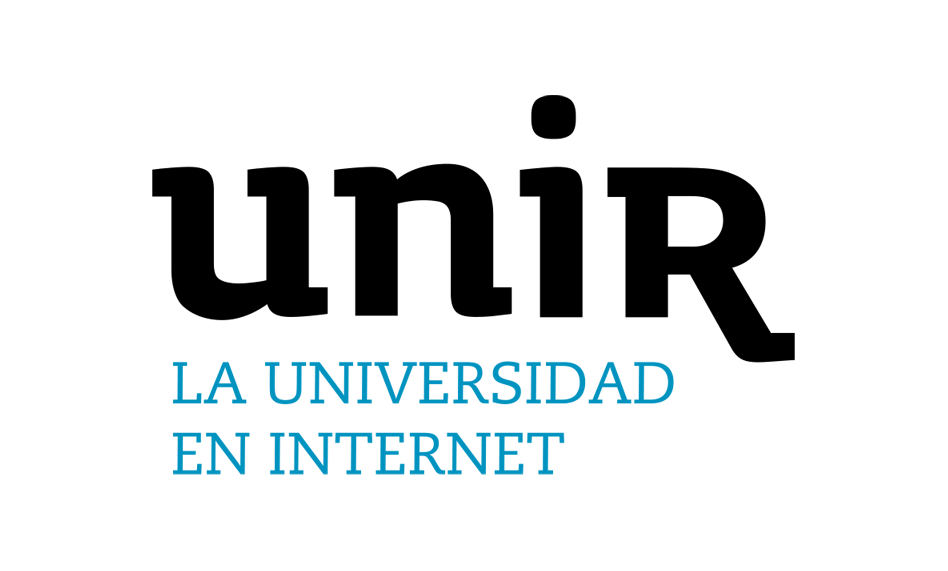
     <div>
        <h1>Tema 10: Minimización del riesgo de una cartera pura en</h1>
        <h1>riesgo a través de una cartera mixta en riesgo.</h1>
        <h1>Teoría del modelo de Precios de Activos Capitales</h1>
        <p>Dr. Miguel Angel Navarro Burgos</p>
        <p>Modelización y Valoración de Derivados y Carteras en Finanzas (MIMC)</p>
    </div>
</div>

Sea el siguiente problema

\begin{equation*}
\left\lbrace
\begin{array}{ccl}
	\text{máx}  &      &S=\frac{mw^{\top} - \mu_{\text{rf}}}{\sqrt{w Cw^{\top}}}\\
	\text{s.a.} &     &\vec{1}w^T=1.
\end{array}
\right.
\end{equation*}

Entonces

\begin{equation*}
w^{\ast}=\frac{(m-\mu_{\text{rf}}\vec{1})C^{-1}}{(m-\mu_{\text{rf}}\vec{1})C^{-1}\vec{1}^{\top}}\text{ y }\lambda^{\ast}=\frac{\mu_{\text{rf}}}{\sqrt{{w^{\ast}} C{w^{\ast}}^{\top}}}.
\end{equation*}


# Ejemplo

In [1]:
import numpy as np

# Datos de entrada
sigma = np.array([0.15, 0.02, 0.3])
rho = [(0, 1, -0.07), (0, 2, 0.02), (1, 2, 0.2)]  # Lista de tuplas (i, j, correlación)
n = len(sigma)

# Construcción de la matriz de covarianza
C = np.diag(sigma**2)
for (i, j, r) in rho:
    C[i, j] = r * sigma[i] * sigma[j]
    C[j, i] = C[i, j]
    
m = np.array([0.3, 0.2, 0.5])
urf = np.array([0.01, 0.02, 0.03])

n=len(m)
nrf = len(urf)
v1 = np.ones(n)
iC = np.linalg.inv(C)

a1 = [(m-urf[i])@iC for i in range(nrf)]
wc = [a1[i]/(a1[i]@v1.T) for i in range(nrf)]
u = [m@wc[i].T for i in range(nrf)]
s = [np.sqrt(wc[i]@C@wc[i].T) for i in range(nrf)]

In [2]:
for i in range(nrf):
	print(f'\nTasa libre de riesgo urf[{i}] = {urf[i]:.3f}')
	print(f'Vector de pesos = {np.round(wc[i],3)}')#{[round(w, 3) for w in wc[i]]}')
	print(f'Rendimiento esperado = {u[i]:.3%}')
	print(f'Riesgo mínimo = {s[i]:.3%}')


Tasa libre de riesgo urf[0] = 0.010
Vector de pesos = [ 0.035  0.968 -0.002]
Rendimiento esperado = 20.273%
Riesgo mínimo = 1.955%

Tasa libre de riesgo urf[1] = 0.020
Vector de pesos = [ 0.035  0.967 -0.002]
Rendimiento esperado = 20.289%
Riesgo mínimo = 1.957%

Tasa libre de riesgo urf[2] = 0.030
Vector de pesos = [ 0.036  0.966 -0.002]
Rendimiento esperado = 20.307%
Riesgo mínimo = 1.959%


In [3]:
wc

[array([ 0.03469618,  0.96775486, -0.00245103]),
 array([ 0.03516408,  0.96691266, -0.00207674]),
 array([ 0.03568707,  0.96597132, -0.00165839])]